# <b><font color='orange'>Data-Driven Campaign Strategy: Optimizing Funnel Conversion and Targeting for Maximum ROI</b>

## Introduction

In today's digital marketplace, every click and advertising dollar has significant implications. What if you could identify hidden trends that indicate which audience segments are most engaged with your campaigns, or pinpoint which stages of your sales funnel require optimization to convert more potential customers? This project investigates these critical questions through a detailed, data-driven lens, focusing on how marketing strategies can be sharpened by analyzing conversion funnels, demographic segmentation, and cost efficiency.

By employing advanced funnel analysis and audience segmentation techniques, this project demonstrates how businesses can enhance their return on investment. It covers everything from finding the sweet spot between impressions and conversions to crafting targeting strategies that make the most of marketing budgets. This project offers practical insights for those aiming to achieve better results with less expenditure. Each discovery sheds light on the crucial factors that can determine the success or failure of a campaign, encouraging readers to explore the often-overlooked elements that drive every click and conversion.

## Background

1. CAMPAIGN EFFECTIVENESS & ROI
    - What is the relationship between the amount of budget spent (Spent) with total conversion and approved conversion?
    - Is there an optimal threshold for ad spend where return on investment starts to decline?
    - Which campaign (xyz_campaign_id) has the lowest cost per conversion? 
    
    Objectives:
    - Analyze the correlation between budget and conversion using linear regression
    - Calculate and compare ROI between campaigns
    - Identify the sweet spot for budget allocation

2. DEMOGRAPHICAL ANALYSIS
    - Is there a significant difference in conversion rate between gender groups?
    - How does age affect the likelihood of conversion?
    - Which interest category shows the highest conversion rate?
    - Is there an interaction between age and gender in influencing conversion?

    Objectives:
    - Conduct a two-sample z-test to compare conversion rates between genders.
    - Analyzing variance (ANOVA) for conversion rates across age groups
    - Create a logistic regression model to predict conversion based on demographic factors
    - Analyzing interaction effects between demographic variables

3. FUNNEL ANALYSIS
    - What is the conversion rate at each funnel stage (Impressions → Clicks → Total Conversion → Approved Conversion)?
    - What are the factors that affect the drop-off rate at each funnel stage?
    - Are there significant differences in funnel metrics between campaigns?

    Objectives:
    - Calculate and analyze conversion rates at each stage of the funnel
    - Identify bottlenecks in the customer journey
    - Compare funnel effectiveness between campaigns using statistical tests

4. CAMPAIGN OPTIMATION
    - How does the number of impressions affect the click-through rate?
    - Is there an optimal point between frequency (impressions per user) and conversion rate?
    - What combination of factors results in the highest conversion rate?

    Objectives:
    - Analyze the non-linear relationship between impressions and clicks
    - Identify the optimal frequency for maximum conversion
    - Create a predictive model for conversion rate

5. SEGMENTATION AND TARGETING
    - Are there differences in cost per conversion between age groups and campaigns?
    - How does the cost per approved conversion vary by gender across various campaigns?
    - Which campaign has the highest effectiveness in terms of segments based on cost per conversion and conversion percentage?

    Objectives:
    - Examine how the cost per conversion varies across different age groups for various marketing campaigns
    - Assess the cost per approved conversion based on gender in different campaigns
    - Identify which campaign offers the most cost-effective segmentation.

6. COST EFFICIENCY
    - Are there variations in cost per click (CPC) across different campaigns, and which ones prove to be the most efficient regarding CPC?
    - How does the cost per conversion (CPConv) vary among campaigns, and which campaigns are the most cost-effective in generating conversions?
    - In what ways does the cost per approved conversion (CPAConv) differ among campaigns, and which campaign demonstrates the highest efficiency for approved conversions?

    Objectives:
    - Analyze the cost per click (CPC) for each campaign to pinpoint the one with the lowest CPC.
    - Review the cost per conversion (CPConv) of each campaign to find out which is the most cost-effective in terms of generating conversions.
    - Identify the campaigns that achieved the lowest cost per approved conversion (CPAConv) to see which were the most efficient at securing approved conversions for the least expense.


## Dataset

The data used in this project comes from social media advertising campaigns of anonymous organizations. This dataset file contains 1143 observations in 11 variables.  Dataset link: https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking/data

Below is a description of the variables.

**Dataset Atribut**

| Atribut | Description |
|------|-------------|
| ad_id | an unique ID for each advertisement |
| xyz_campaign_id | Identifier for the campaign associated with the ad |
| fb_campaign_id | Facebook campaign identifier |
| age | Age group targeted by the ad (e.g., "30-34") |
| gender | Gender targeted by the ad (e.g., "M" for male, "F" for female) |
| interest | Interest category targeted by the ad |
| Impressions | Number of times the ad was displayed |
| Clicks | Number of times the ad was clicked |
| Spent | Amount spent on the ad in dollars |
| Total_Conversion | Total number of conversions (i.e., actions taken by users) from the ad |
| Approved_Conversion | Number of conversions approved |



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, f_oneway
from scipy.stats import pearsonr
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Turn off alerts so as not to interfere with the output
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load and prepare the data
df = pd.read_csv("KAG_conversion_data.csv")

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## Exploratory Data Analysis (EDA)

In [4]:
# Data preparetaion and exploratory data analytics

def explore_data(df):
    """
    Perform intial data exploration
    :params df: <string> input dataset file name
    :return df: <pandas> processed data
    """
    # Print dataset shape
    print('='*40)
    print(f'Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns') 
    print('='*40)

    # Check for missing values
    print('\nMissing values in each columns:')
    print('-'*40)
    print(df.isnull().sum())
    print('='*40)

    # Check  for data duplicates
    print(f'\nNumber of Duplicated Rows: {df.duplicated().sum()}')
    print('='*40)

    # Dataset Information
    print('\nDataset info:')
    print('-'*40)
    df.info()
    print('='*40)

    # Descriptive statistics
    print('\nDescriptive Statistics:')
    print('-'*40)
    print(df.describe().T)
    print("="*40)
    
# Run the function
explore_data(df)

Dataset shape: 1143 rows, 11 columns

Missing values in each columns:
----------------------------------------
ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

Number of Duplicated Rows: 0

Dataset info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Imp

In [5]:
print(df['xyz_campaign_id'].value_counts())
print('---------------------------')
print(df['xyz_campaign_id'].info())

xyz_campaign_id
1178    625
936     464
916      54
Name: count, dtype: int64
---------------------------
<class 'pandas.core.series.Series'>
RangeIndex: 1143 entries, 0 to 1142
Series name: xyz_campaign_id
Non-Null Count  Dtype
--------------  -----
1143 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB
None


Based on the statistical information provided, we can see that `xyz_campaign_id` contains only three unique values: 916, 936, and 1178. The `xyz_campaign_id` column probably indicates a particular advertising campaign ID and is not a numeric attribute with a wide range of continuous or discrete values. The various entries in this column do not signify significant quantitative differences; instead, they represent different types or labels of campaigns.

In [6]:
# Copy dataframe for backup
df_copy = df.copy()

## 1. Exploratory Data Analysis (EDA)

#### 1.1 Numerical Distributions

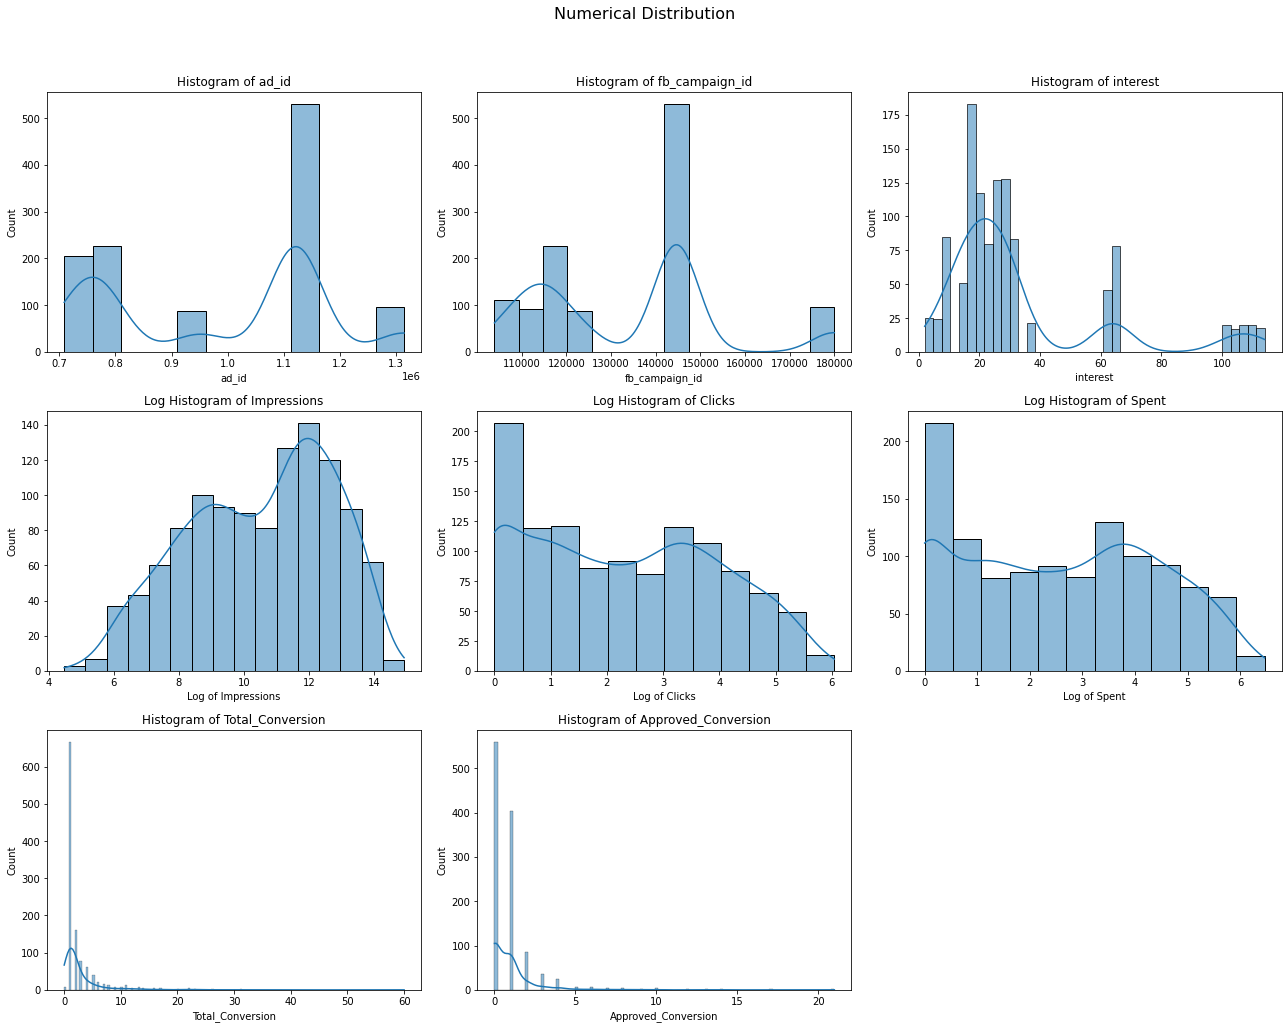

In [7]:
# Numerical features (tanpa xyz_campaign_id)
numerical_features = ['ad_id', 'fb_campaign_id', 'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']

# Set up the figure and axes
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.suptitle('Numerical Distribution', fontsize=16)

# Flatten the axes array for easier indexing
axis = axis.flatten()

# The function np.log1p is incredibly useful in data analysis, particularly when working with uneven data or very small values. 
# It aids in creating more effective data visualizations and enhances our understanding of the data.

# Loop through numerical features to plot histograms
for i, feature in enumerate(numerical_features):
    # Apply log transformation for skewed features
    if feature in ['Impressions', 'Clicks', 'Spent']:
        sns.histplot(np.log1p(df[feature]), ax=axis[i], kde=True)
        axis[i].set_title(f'Log Histogram of {feature}', fontsize=12)
        axis[i].set_xlabel(f'Log of {feature}')
    else:
        sns.histplot(df[feature], ax=axis[i], kde=True)
        axis[i].set_title(f'Histogram of {feature}', fontsize=12)
    # sns.histplot(df[feature], ax=axis[i], kde=True)
    # axis[i].set_title(f'Histogram of {feature}', fontsize=12)
    # axis[i].set_xlabel(f'{feature}')

# Remove empty subplots if any
for j in range(len(numerical_features), len(axis)):
    fig.delaxes(axis[j])

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add space for the main title
plt.show()

Insight:

- `ad_id`: The histogram of ad_id displays a distribution that is mainly centered on values from 0.7 million to 1.3 million. The presence of several peaks suggests that the data is more categorical, with certain ID values being more prominent.
- `fb_campaign_id`: The fb_campaign_id column shows a significant skew in its distribution, with a majority of the data clustered between values of 110,000 and 170,000. This indicates that most Facebook campaign IDs are concentrated within this specific range.
- `interest`: Interest shows a distribution that is heavily skewed to the left, with a significant concentration in the lower range, particularly below 30. However, there are also some data points that indicate high values (over 70), which could represent outlier cases.
- `Log of Impressions`: The distribution of Impressions indicates that following the log transformation, the data appears more evenly spread out, featuring more varied peaks. While the majority of Impressions values fall below 12, there are also significantly higher values that are considered outliers.
- `Log of Clicks`: The distribution of clicks appears to be skewed, but after applying a log transformation, the data becomes more balanced. Most of the data clusters around lower values, although there are a few instances of higher clicks, suggesting some variation in how campaigns are interacted with.
- `Log of Spent`: The Spent column illustrates a distribution with a majority of the data centered around the lower values, along with a more consistent log distribution. There are peaks that point to a concentration of spending at various points.
- `Total_Conversion`: Total_Conversion shows a highly skewed distribution, where the majority of values fall between 0 and 3 conversions. This suggests that most campaigns experience low conversions or may not have any conversions at all.
- `Approved_Conversion`: The Approved_Conversion data indicates a significant leftward skew, where the majority of values are either 0 or 1. This implies that the campaign saw approvals in only a limited number of cases.  

In [8]:
# Check unique xYZ_campaign_id
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178], dtype=int64)

Here, we see there are 3 different ad campaigns for xyz_company_id 916, 936 and 1178. Now we'll replace their names with campaign_a, campaign_b and campaign_c for better visualisation 

In [9]:
# Change the data type of the xyz_campaign_id column to category
df['xyz_campaign_id'] = df['xyz_campaign_id'].astype('category')

In [10]:
# Replace the campaign IDs with their names for better understanding
df['xyz_campaign_id'].replace({916:'campaign_a', 936:'campaign_b', 1178:'campaign_c'}, inplace=True)

In [11]:
# Get xyz_campaign_id info
df['xyz_campaign_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1143 entries, 0 to 1142
Series name: xyz_campaign_id
Non-Null Count  Dtype   
--------------  -----   
1143 non-null   category
dtypes: category(1)
memory usage: 1.4 KB


In [12]:
df['xyz_campaign_id'].value_counts()

xyz_campaign_id
campaign_c    625
campaign_b    464
campaign_a     54
Name: count, dtype: int64

As we can see the sum result of each campaign is the same as before the data type change.

#### 1.2 Categorical Distribution

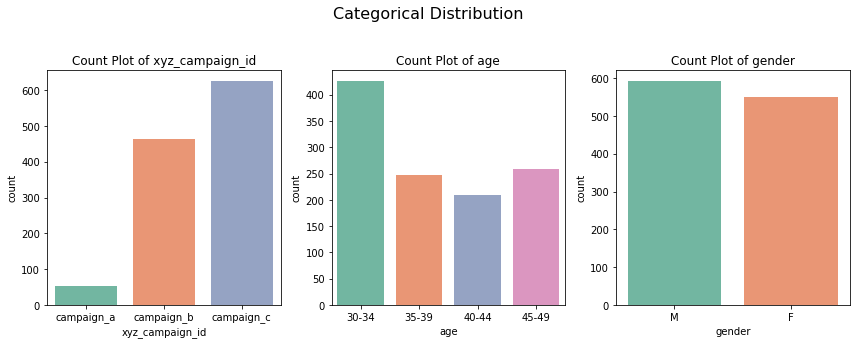

In [13]:
def categorical_distribution(df):
    """
    This function visualizes the categorical distribution of the 'xyz_campaign_id', 'age', and 'gender' columns in a given DataFrame.
    It creates a count plot for each categorical feature using seaborn.

    Parameters:
    df (pandas DataFrame): The input DataFrame containing the 'xyz_campaign_id', 'age', and 'gender' columns.
    Returns:
    None. The function generates a plot displaying the count of each category for each categorical feature.
    """
    # Categorical features
    categorical_features = ['xyz_campaign_id', 'age', 'gender']

    # Set up the figure and axes
    fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
    fig.suptitle('Categorical Distribution', fontsize=16)

    # Flatten the axes array for easier indexing
    axis = axis.flatten()

    # Loop through numerical features to plot histograms
    for i, feature in enumerate(categorical_features):
        sns.countplot(data=df, x=feature, ax=axis[i], palette='Set2')
        axis[i].set_title(f'Count Plot of {feature}', fontsize=12)
        axis[i].set_xlabel(f'{feature}')

    # Adjust layout to prevent overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add space for the main title
    plt.show()

categorical_distribution(df)


**Categorical Distibution Insight:**

- Campaign campaign_c has the most ads, followed by campaign_b, and campaign_a has the fewest ads.
- The age group of 30-34 had the most ads compared to other age groups, with 45-49 coming in second.
- The number of ads aimed at men (M) and women (F) was nearly the same, with a slight edge towards men. This indicates that the campaign was designed to appeal to both genders fairly, though there was a minor inclination towards men.

#### 1.3 Heatmap Correlationship

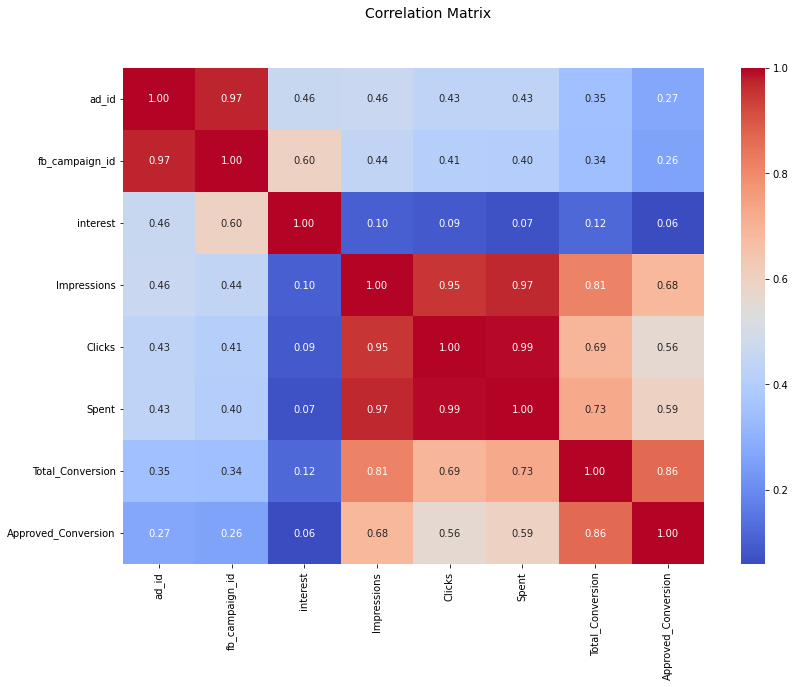

In [14]:
# Correlation relationship between numerical variables using Heatmap
def correlation_eda(data):
    """
    This function performs exploratory data analysis (EDA) on a given dataset by visualizing the correlation 
    coefficients between numerical variables using a heatmap.

    Parameters:
    data (pandas DataFrame): The input dataset containing numerical variables.#+
    """
    
    plt.figure(figsize=(12, 10))
    plt.suptitle('Correlation Matrix', fontsize=14)
    sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add space for the main title
    plt.show()

correlation_eda(df)

**Insight:**

- The relationship between ad_id and fb_campaign_id is extremely strong, with a correlation of 0.97. This suggests that these two variables are closely linked or may even be redundant. It could imply that each campaign features unique ad IDs with little variation.
- Clicks, Impressions, and Spent Show Strong Correlation:
    - The correlation between Clicks and Impressions is very high at 0.95, indicating that an increase in impressions usually leads to more clicks
    - Additionally, Spending has a robust correlation with both Impressions (0.97) and Clicks (0.99). This is not surprising, as greater ad exposure generally leads to increased spending.
- Total Conversion and Approved Conversion:
    - There’s a strong correlation (0.86) between Total_Conversion and Approved_Conversion, which means that an increase in total conversions typically results in more approved conversions
    - Additionally, Total_Conversion shows a good correlation with Impressions (0.81), indicating that greater ad exposure tends to boost conversion rates.
- Interest Shows Low Correlation with Conversion Metrics:
    - The interest variable shows low correlations with both Total_Conversion (0.12) and Approved_Conversion (0.06), suggesting that the level of interest might not have a significant direct effect on conversion rates.
- Weak Relationship of Ad ID and Campaign ID with Conversion Metrics:
    - The ad_id and fb_campaign_id appear to have weak correlations with Total_Conversion and Approved_Conversion, indicating that the specific ad or campaign ID does not significantly influence conversion rates.

#### 1.4 Conversion by Category

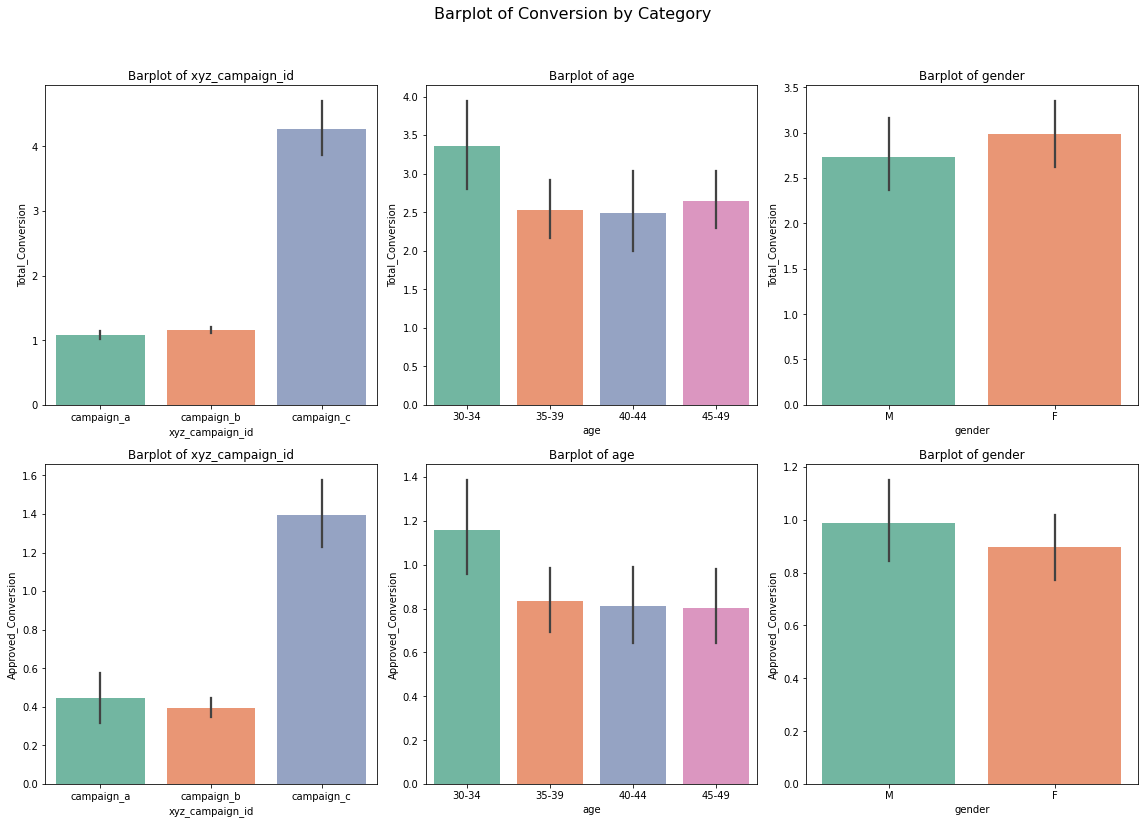

In [15]:
def conversion_by_category(df):
    """
    This function calculates and visualizes the conversion rates (Total and Approved Conversions)
    for different categories in the given dataset.
    Parameters:
    df (pandas DataFrame): The input dataset containing the following columns:
        - xyz_campaign_id: The ID of the advertising campaign.
        - age: The age of the audience segment.
        - gender: The gender of the audience segment.
        - Total_Conversion: The total number of conversions.
        - Approved_Conversion: The number of conversions that were approved.
    Returns:
    None. The function generates a set of bar plots to visualize the conversion rates by category.
    """
 
    categorical_features = ['xyz_campaign_id', 'age', 'gender']

    # Set up the figure and axes
    fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
    fig.suptitle('Barplot of Conversion by Category', fontsize=16)

    # Flatten the axes array for easier indexing
    axis = axis.flatten()

    # Loop through numerical features to plot barplot
    for i, feature in enumerate(categorical_features):
        # Barplot for Total Conversion by Category
        sns.barplot(data=df, x=feature, y='Total_Conversion', ax=axis[i], palette='Set2')
        axis[i].set_title(f'Barplot of {feature}', fontsize=12)
        axis[i].set_xlabel(f'{feature}')

        # Barplot for Approved Conversion by Category
        sns.barplot(data=df, x=feature, y='Approved_Conversion', ax=axis[i+3], palette='Set2')
        axis[i+3].set_title(f'Barplot of {feature}', fontsize=12)
        axis[i+3].set_xlabel(f'{feature}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add space for the main title
    plt.show()

conversion_by_category(df)

**Insight:**

- Total Conversion
    - Campaign:
        - Campaign C has the highest total conversion rate, significantly surpassing both Campaign A and Campaign B.
    - Age Group:
        - The age group of 30-34 shows the highest average total conversion when compared to other age groups.
        - The 35-39 and 40-44 age groups have total conversions that are quite similar, both slightly trailing behind the 30-34 group.
        - Meanwhile, the 45-49 age group has a total conversion that is nearly on par with the others, yet still falls short of the 30-34 age group's performance.
    - Gender:
        - Females (F) show a slightly higher total conversion compared to males (M), although the difference is not significant.

- Approved Conversion
    - Campaign:
        - Campaign C stands out with the highest average approved conversion when compared to Campaign A and Campaign B
        - The approved conversion rates for Campaign A and Campaign B are lower, reflecting a similar trend seen in total conversion.
    - Age Group:
        - The age group of 30-34 shows the highest rate of approved conversions, aligning with the overall conversion results.
        - The 35-39, 40-44, and 45-49 age groups exhibit lower approved conversions, following a similar trend as seen in the total conversion data.
    - Gender:
        - Males (M) have a slightly higher approval conversion rate than females (F), which differs from the overall conversion pattern, although the difference is still minimal.

In [16]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1


## 1. Effectiveness & ROI Analysis

This business challenge focuses on evaluating the success of advertising campaigns and optimizing spending to increase conversions. The goal is to analyze how budget impacts conversion rates through linear regression, aiming to find an ideal spending threshold before the return on investment starts to fall. Moreover, campaigns are compared based on their cost per conversion to identify the most efficient options, guiding the allocation of budgets for achieving the highest conversions at the lowest possible cost.

In [17]:
def campaign_effectiveness(df):
    """
    Analyzes campaign effectiveness, ROI, and identifies budget threshold.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing ad campaign data. 
                       Expected columns: 'xyz_campaign_id', 'Spent', 'Total_Conversion', 
                       'Approved_Conversion', 'Clicks', 'Impressions'.

    Returns:
    campaign_summary (pd.DataFrame): Summary metrics for each campaign including cost per conversion,
                                     conversion rate, ROI, and budget threshold.
    """
    # Step 1: Campaign level metrics
    campaign_summary = df.groupby('xyz_campaign_id').agg({
        'Spent': 'sum',
        'Total_Conversion': 'sum',
        'Approved_Conversion': 'sum',
        'Clicks': 'sum',
        'Impressions': 'sum'
    }).reset_index()

    # Calculate Cost per conversion (CPC), Conversion rate, and ROI
    campaign_summary['cost_per_conversion'] = campaign_summary['Spent'] / campaign_summary['Clicks']
    campaign_summary['conversion_rate'] = campaign_summary['Total_Conversion'] / campaign_summary['Clicks']
    campaign_summary['ROI'] = (campaign_summary['Approved_Conversion'] / campaign_summary['Spent']) 

    # Step 2: Correlation Analysis between Budget and Conversion
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x='Spent', y='Approved_Conversion', scatter_kws={'s': 50}, line_kws={'color': 'red'}) 
    plt.title('Spent vs Approved Conversion') 
    plt.xlabel('Budget Spent')
    plt.ylabel('Approved Conversion')
    plt.show()

    # Calculate correlation coefficient
    # The Pearson correlation coefficient measures the linear relationship between two datasets
    correlation, p_value = pearsonr(df['Spent'], df['Approved_Conversion'])
    print(f'Correlation between Spent and Approved Conversion: {correlation:.2f}, p-value: {p_value:.4f}')

    # Step 3: Liniear Regression Analysis for Budget and Conversion
    x = df[['Spent']]
    y = df[['Approved_Conversion']]
    model = sm.OLS(y, sm.add_constant(x)).fit()
    print('\nLiniear Regression Result between Spent and Approved Conversion:')
    print(model.summary())

    # Step 4: Indentify budget threshold for optimal ROI
    percentiles = np.percentile(df['Spent'], [25, 50, 75, 90])
    percentiles_labels = ['25%', '50%', '75%', '90%']
    roi_per_percentile = []

    for i in range(len(percentiles)):
        subset = df[df['Spent'] <= percentiles[i]]
        avg_roi = (subset['Approved_Conversion'] / subset['Spent']).mean() # Total_Conversion change to Approved_Conversion
        roi_per_percentile.append((percentiles[i], avg_roi, percentiles_labels[i]))

    # Convert ROI to percentile to dataframe
    roi_df = pd.DataFrame(roi_per_percentile, columns=[ 'Spent_percentile', 'Avg_ROI', 'Percentage'])

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=roi_df, x='Spent_percentile', y='Avg_ROI', marker='o')
    plt.title('ROI vs Budget Percentile')
    plt.xlabel('Budget Spent Percentile')
    plt.ylabel('Average ROI')
    plt.axvline(x=percentiles[1], color='r', linestyle='--', label='Median Budget Threshold')
    plt.legend()
    plt.show()

    print('\nROI at various spending percentiles:')
    print(roi_df[['Percentage', 'Spent_percentile', 'Avg_ROI']])

    # Return the campaign summary dataframe with added metrics
    return campaign_summary

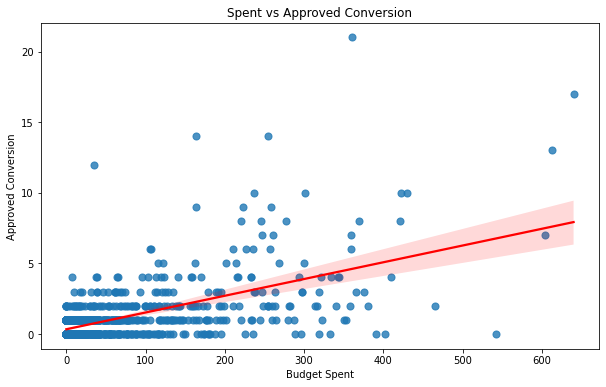

Correlation between Spent and Approved Conversion: 0.59, p-value: 0.0000

Liniear Regression Result between Spent and Approved Conversion:
                             OLS Regression Results                            
Dep. Variable:     Approved_Conversion   R-squared:                       0.352
Model:                             OLS   Adj. R-squared:                  0.351
Method:                  Least Squares   F-statistic:                     619.4
Date:                 Tue, 19 Nov 2024   Prob (F-statistic):          1.43e-109
Time:                         14:11:53   Log-Likelihood:                -2005.1
No. Observations:                 1143   AIC:                             4014.
Df Residuals:                     1141   BIC:                             4024.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [

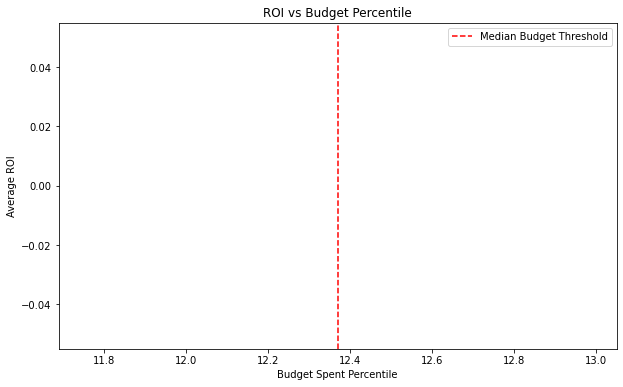


ROI at various spending percentiles:
  Percentage  Spent_percentile  Avg_ROI
0        25%          1.480000      inf
1        50%         12.370000      inf
2        75%         60.025000      inf
3        90%        163.215999      inf


,xyz_campaign_id,Spent,Total_Conversion,Approved_Conversion,Clicks,Impressions,cost_per_conversion,conversion_rate,ROI
0,campaign_a,149.710001,58,24,113,482925,1.324867,0.513274,0.160310
1,campaign_b,2893.369999,537,183,1984,8128187,1.458352,0.270665,0.063248
2,campaign_c,55662.149959,2669,872,36068,204823716,1.543256,0.073999,0.015666


In [18]:
# Run the function to analyze campaign effectiveness and ROI
campaign_effectiveness(df)

**Campaign Effectiveness Insight**

Research Questions: 

- The relationship between budget (Spent) and approved conversion:
    - The correlation analysis indicates a positive correlation of 0.59 between the budget spent (Spent) and the number of Approved Conversions, with a significant p-value (p-value: 0.0000). This implies that as the budget increases, the number of approved conversions generally rises too, although the correlation is considered moderate.
    - The linear regression analysis between Spent and Approved Conversion shows that the model explains 35.2% of the variability in Approved Conversion (R-squared: 0.352). The coefficient for Spent, which is 0.0119, suggests that for each additional unit of budget spent, Approved Conversion rises by 0.0119 units, provided that all other factors stay the same.

-  The optimal threshold of ad spend where ROI starts to decline:
    - In the ROI versus Budget Percentile graph, ROI values change at various budget percentiles, with some values hitting infinity. This variability might be a result of having very few or no approved conversions in specific low-budget ranges.
    - The data does not provide a clear sweet spot, as the ROI appears to be inconsistent and does not demonstrate a reliable downward trend at certain percentiles. To determine the optimal threshold, further analysis with larger sample sizes or additional metrics will be required.

- The campaign that achieved the lowest cost per conversion is as follows:
    - According to the sample data provided:
        - campaign_a recorded a cost per conversion of 1.32
        - campaign_b had a cost per conversion of 1.46
        - campaign_c had the highest cost per conversion at 1.54.
    - Therefore, campaign_a stands out as the most efficient campaign in terms of cost per conversion.

Objectives: 

- Analyze the correlation between budget and conversion using linear regression: 
    - The correlation coefficient of 0.59 indicates a strong positive relationship between budget and approved conversion rates.
    - Furthermore, the linear regression model suggests that increasing the budget positively influences approved conversion, as evidenced by an Adjusted R-squared value of 0.351, which points to a moderate effect of budget on conversion results.

- Calculate and compare ROI between campaigns: 
    - The data reveals that campaign_a has the highest ROI at 0.160, with campaign_b next at 0.063, and campaign_c at 0.015. This suggests that campaign_a was more efficient in converting its budget into approved conversions than the other campaigns.

- Finding the ideal budget allocation:
    - The data analysis indicates that there isn't a specific ad spend percentile where ROI significantly declines. However, the higher ROI observed at lower budgets implies that campaigns with smaller expenditures tend to have better ROI potential, though this might be influenced by lower conversion volumes.
    - More extensive testing with a larger dataset is necessary to identify the best budget allocation point that sustains high ROI while still achieving the needed conversion volume.

- To enhance campaign effectiveness and ROI, initial recommendations are as follows:
    - Focus budget allocation on campaigns that demonstrate a low cost per conversion (for example, campaign_a).
    - Refine campaign strategies for those with low to medium budgets, as these often yield a higher ROI.
    - Explore the option of further segmenting budgets by individual campaigns to identify a more precise sweet spot.

## 2. Demographic Analysis

This business problem focuses on understanding the impact of demographic factors on conversion rates. The analysis seeks to determine if there are significant differences in conversion rates between genders, how age influences conversion likelihood, which interest categories yield the highest conversion rates, and whether there's an interaction between age and gender affecting conversions. The study will involve a two-sample z-test to compare gender conversion rates, an ANOVA to assess age group differences, a logistic regression model to predict conversions based on demographics, and an analysis of interaction effects between demographic variables.

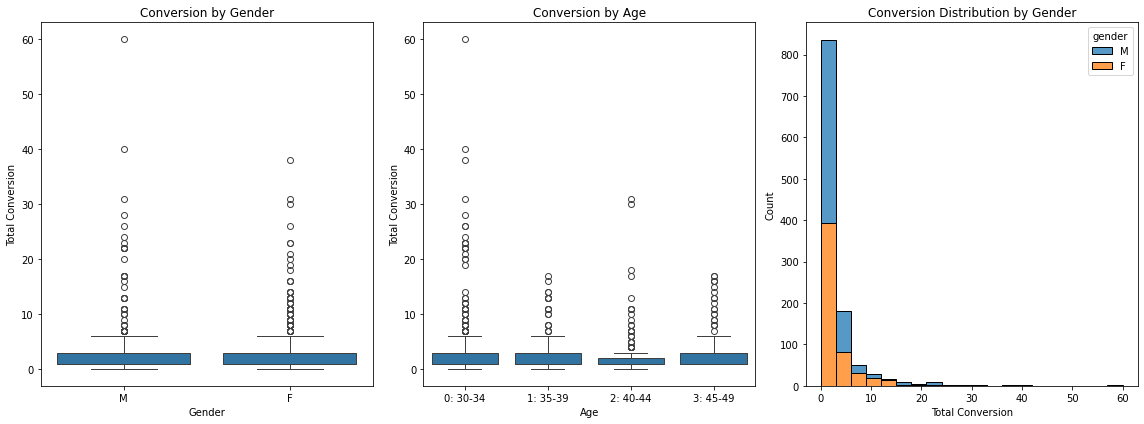


KEY FINDINGS

Gender Comparison:
T-test p-value: 0.3519
Enhanced test p-value: 0.3519

Age Analysis:
ANOVA p-value: 0.0331

Feature Importance:
age: 0.2940
gender_F: -0.4626
gender_M: 0.4626

Descriptive Statistics by Gender:
       Total_Conversion           Approved_Conversion          
                    sum      mean                 sum      mean
gender                                                         
F                  1644  2.983666                 495  0.898367
M                  1620  2.736486                 584  0.986486

Descriptive Statistics by Age:
    Total_Conversion           Approved_Conversion          
                 sum      mean                 sum      mean
age                                                         
0               1431  3.359155                 494  1.159624
1                626  2.524194                 207  0.834677
2                523  2.490476                 170  0.809524
3                684  2.640927                 208  0.8

In [19]:
# Define the comparison functions first

def compare_gender_conversion(df, gender_col, conversion_col):
    """
    Compare the conversion rates between male and female groups.
    This function calculates the p-value for a two-sample independent t-test to determine if there is a significant difference in conversion rates between male and female groups.

    Parameters:
    df : pandas.DataFrame
        A DataFrame containing the following columns:
        - gender_col: The column name representing the gender of individuals.
        - conversion_col: The column name representing the conversion rates.
    Returns:
    The p-value of the two-sample independent t-test. A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, suggesting that there is a significant difference in conversion rates between male and female groups.
    """
    male_conversion = df[df[gender_col] == 'M'][conversion_col]
    female_conversion = df[df[gender_col] == 'F'][conversion_col]
    _, p_value = ttest_ind(male_conversion, female_conversion)
    return p_value


def anova_age_conversion(df, age_col, conversion_col):
    """
    Perform an Analysis of Variance (ANOVA) test to compare the conversion rates between different age groups.
    This function calculates the p-value for a one-way ANOVA test to determine if there is a significant difference in conversion rates between age groups.
    Parameters:
    df : pandas.DataFrame
        A DataFrame containing the following columns:
        - age_col: The column name representing the age of individuals.
        - conversion_col: The column name representing the conversion rates.

    Returns:
        The p-value of the one-way ANOVA test. A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, suggesting that there is a significant difference in conversion rates between age groups.
    """
    age_groups = [df[df[age_col] == age][conversion_col] for age in df[age_col].unique()]
    _, p_value = f_oneway(*age_groups)
    return p_value


def logistic_regression_conversion(df, features, target):
    """
    Perform logistic regression to predict conversion based on given features.

    Parameters:
    df : pandas.DataFrame
        A DataFrame containing the following columns:
        - features: The independent variables used to predict the target variable.
        - target: The dependent variable to be predicted.
    Returns:
    model : sklearn.linear_model.LogisticRegression
        The trained logistic regression model.
    """
    X = df[features]
    y = df[target]
    model = LogisticRegression()
    model.fit(X, y)
    return model


# Original Analysis Function
def demographic_analysis_original(df):
    """
    Perform a basic demographic analysis on the given DataFrame.
    This function calculates the sum and mean of total and approved conversions for each gender and age group.
    It also performs a two-sample independent t-test to compare the conversion rates between male and female groups.

    Parameters:
    df : pandas.DataFrame
        A DataFrame containing the following columns:
        - 'gender': The gender of the individuals.
        - 'age': The age of the individuals.
        - 'Total_Conversion': The total number of conversions.
        - 'Approved_Conversion': The number of approved conversions.

    Returns: 
        A dictionary containing the following keys:
        - 'gender_metrics': A DataFrame summarizing the total and mean conversions for each gender.
        - 'age_metrics': A DataFrame summarizing the total and mean conversions for each age group.
        - 't_test_result': A dictionary containing the results of the two-sample independent t-test.
    """
    gender_conv = df.groupby('gender').agg({
        'Total_Conversion': ['sum', 'mean'],
        'Approved_Conversion': ['sum', 'mean']
    })
    age_conv = df.groupby('age').agg({
        'Total_Conversion': ['sum', 'mean'],
        'Approved_Conversion': ['sum', 'mean']
    })
    gender_groups = df.groupby('gender')
    conv_a = gender_groups.get_group('M')['Total_Conversion']
    conv_b = gender_groups.get_group('F')['Total_Conversion']
    stat, pval = ttest_ind(conv_a, conv_b)

    return {
        'gender_metrics': gender_conv,
        'age_metrics': age_conv,
        't_test_result': {'statistic': stat, 'p_value': pval}
    }

# Enhanced Analysis Function
def demographic_analysis_enhanced(df):
    """
    Perform an enhanced demographic analysis on the given DataFrame.
    This function calculates the p-value for a two-sample independent t-test to compare the conversion rates between male and female groups,
    and performs an Analysis of Variance (ANOVA) test to compare the conversion rates between different age groups.
    It also performs logistic regression to predict conversion based on given features.

    Parameters:
    df : pandas.DataFrame
        A DataFrame containing the following columns:
        - 'gender': The gender of the individuals.
        - 'age': The age of the individuals.
        - 'Total_Conversion': The total number of conversions.
        - 'Approved_Conversion': The number of approved conversions.

    Returns:
    dict
        A dictionary containing the following keys:
        - 'gender_test_p_value': The p-value of the two-sample independent t-test for gender comparison.
        - 'age_test_p_value': The p-value of the ANOVA test for age comparison.
        - 'logistic_model': The trained logistic regression model.
        - 'feature_importance': A dictionary containing the feature importance of the logistic regression model.
    """
    gender_p_value = compare_gender_conversion(df, 'gender', 'Total_Conversion')
    age_p_value = anova_age_conversion(df, 'age', 'Total_Conversion')
    features = ['age']  
    df['conversion_binary'] = (df['Total_Conversion'] > 0).astype(int)

    # Create dummy variables for gender
    df_encoded = pd.get_dummies(df, columns=['gender'])
    features.extend(['gender_F', 'gender_M'])

    model = logistic_regression_conversion(df_encoded, features, 'conversion_binary')

    return {
        'gender_test_p_value': gender_p_value,
        'age_test_p_value': age_p_value,
        'logistic_model': model,
        'feature_importance': dict(zip(features, model.coef_[0]))
    }


# Comprehensive Demographoc Function
def comprehensive_demographic_analysis(df):
    """
    Performs a comprehensive demographic analysis on the given DataFrame.
    Converts age ranges to categorical codes, calculates basic metrics,
    performs original and enhanced analyses, and creates visualizations.

    Parameters:
    df (pandas.DataFrame): A DataFrame containing the following columns:
        - 'gender': The gender of the individuals.
        - 'age': The age of the individuals.
        - 'Total_Conversion': The total number of conversions.
        - 'Approved_Conversion': The number of approved conversions.

    Returns:
    dict: A dictionary containing the following keys:
        - 'basic_metrics': A dictionary containing basic metrics.
        - 'original_analysis': A dictionary containing the results of the original analysis.
        - 'enhanced_analysis': A dictionary containing the results of the enhanced analysis.
    """
    # Convert age ranges to categorical codes
    df['age'] = pd.Categorical(df['age']).codes

    basic_metrics = {
        'total_conversions': df['Total_Conversion'].sum(),
        'approved_conversions': df['Approved_Conversion'].sum(),
        'unique_ages': df['age'].nunique(),
        'gender_distribution': df['gender'].value_counts(normalize=True)
    }

    original_results = demographic_analysis_original(df)
    enhanced_results = demographic_analysis_enhanced(df)

    fig, axes = plt.subplots(1, 3, figsize=(16, 6))

    # Conversion by Gender
    sns.boxplot(data=df, x='gender', y='Total_Conversion', ax=axes[0])
    axes[0].set_title("Conversion by Gender")
    axes[0].set_xlabel("Gender")
    axes[0].set_ylabel("Total Conversion")

    # Conversion by Age
    sns.boxplot(data=df, x='age', y='Total_Conversion', ax=axes[1])
    axes[1].set_title("Conversion by Age")
    axes[1].set_xlabel("Age")
    axes[1].set_ylabel("Total Conversion")

    # Adding age range labels on the x-axis for Conversion by Age
    age_labels = ["0: 30-34", "1: 35-39", "2: 40-44", "3: 45-49"]
    axes[1].set_xticklabels(age_labels)

    # Conversion Distribution by Gender
    sns.histplot(data=df, x='Total_Conversion', hue='gender', multiple="stack", ax=axes[2], kde=False, bins=20)
    axes[2].set_title("Conversion Distribution by Gender")
    axes[2].set_xlabel("Total Conversion")
    axes[2].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

    return {
        'basic_metrics': basic_metrics,
        'original_analysis': original_results,
        'enhanced_analysis': enhanced_results
    }

# Execute the analysis
try:
    results = comprehensive_demographic_analysis(df)

    print("\nKEY FINDINGS")
    print("============")
    print(f"\nGender Comparison:")
    print(f"T-test p-value: {results['original_analysis']['t_test_result']['p_value']:.4f}")
    print(f"Enhanced test p-value: {results['enhanced_analysis']['gender_test_p_value']:.4f}")

    print(f"\nAge Analysis:")
    print(f"ANOVA p-value: {results['enhanced_analysis']['age_test_p_value']:.4f}")

    print("\nFeature Importance:")
    for feature, importance in results['enhanced_analysis']['feature_importance'].items():
        print(f"{feature}: {importance:.4f}")

except Exception as e:
    print(f"An error occurred: {str(e)}")
    
print("\nDescriptive Statistics by Gender:")
print(results['original_analysis']['gender_metrics'])

print("\nDescriptive Statistics by Age:")
print(results['original_analysis']['age_metrics'])


**Demographic Insights**

Research Questions: 

- Differences in Conversion Rate Based on Gender:
    - According to the t-test result with a p-value of 0.3519, there is no significant difference in the conversion rates between male (M) and female (F) groups.
    - Looking at the descriptive statistics, the average total conversion for females (F) is 2.98, which is a bit higher than the average for males (M) at 2.74. However, this difference is not statistically significant.

- Effect of Age on Conversion Probability: 
    - The ANOVA analysis for conversion rates among different age groups indicates a p-value of 0.0331, suggesting a significant difference in conversion rates across these groups.
    - According to the descriptive statistics, the 30-34 age group exhibits the highest average total conversion rate at 3.36, while the 45-49 age group shows a lower average conversion rate of 2.64. This implies that age could influence the likelihood of conversion, particularly among younger individuals.

- Interest Category with the Highest Conversion Rate: 
    - According to the feature importance analysis, the age variable stands out with the highest score of 0.2940, highlighting its substantial role in predicting conversion through age-based interest categories.
    - This information suggests that age demographics greatly affect conversion rates, even if it doesn't directly identify particular interest categories.

- Interaction between Age and Gender in Influencing Conversion: 
    - The visualization shows that the total conversions are fairly consistent between males and females across different age groups. However, there doesn't appear to be a strong interaction effect between age and gender on conversion rates.
    - The feature importance values for gender (gender_F: -0.4626, gender_M: 0.4626) imply that gender does not play a major role in influencing the conversion rate when compared to age

Objectives:

- Two-Sample Z Test to Compare Conversion Rates between Genders: 
    - The t-test produced a p-value of 0.3519, suggesting that there is no significant difference in the conversion rates between men and women.
    - While there is a minor difference in the average total conversion rates for each gender, it is not substantial enough to be considered significant.

- ANOVA for Conversion Rate between Age Groups: 
    - The ANOVA results indicate a p-value of 0.0331, suggesting that age significantly affects the conversion rate.
    - The 30-34 age group demonstrates a higher average conversion rate compared to other age groups, implying that age might be linked to the interest level in the product or service being provided.

- Logistic Regression Model for Conversion Prediction Based on Demographic Factors: 
    - Feature importance indicates that age plays a more significant role than gender.
    - Age has an importance score of 0.2940, suggesting that the model views age as a key factor in predicting conversion, whereas gender has a lesser impact.

- Analysis of Interaction Effects between Demographic Variables: 
    - There is no notable interaction between age and gender when it comes to influencing conversion, according to the analysis and visualization results.
    - The analysis indicates that although age serves as a more powerful predictor of conversion, the combined effect of gender and age does not yield a significant interaction.

The analysis indicates that age is a more significant demographic factor affecting conversion rates, particularly among the younger demographic (30-34 years). In contrast, gender appears to have no notable impact, either on its own or in conjunction with age, regarding conversion rates.

## 3. Funnel Analysis

This business problem focuses on evaluating the efficiency of conversions at every stage of the funnel - from Impressions to Approved Conversions. It seeks to identify significant drop-offs and compare the performance of different campaigns. The objectives include calculating conversion rates, identifying bottlenecks, and assessing the effectiveness of campaigns using statistical tests.

In [20]:
def funnel_analysis(df):
    """
    Analyze conversion funnel metrics

    Parameters:
    df (pandas.DataFrame): A DataFrame containing the following columns:
        - 'Impressions': The number of impressions.
        - 'Clicks': The number of clicks.
        - 'Total_conversion': The total number of conversions.
        - 'Approved_conversion': The number of approved conversions.
    Returns:
    dict: A dictionary containing the following funnel metrics:
        - 'total_impressions': The total number of impressions.
        - 'total_clicks': The total number of clicks.
        - 'total_conversions': The total number of conversions.
        - 'approved_conversions': The number of approved conversions.
        - 'ctr': The click-through rate (total_clicks / total_impressions).
        - 'conversion_rate': The conversion rate (total_conversions / total_clicks).
        - 'approval_rate': The approval rate (approved_conversions / total_conversions).
    """
    funnel_metrics = {
        'total_impressions': df['Impressions'].sum(),
        'total_clicks': df['Clicks'].sum(),
        'total_conversions': df['Total_Conversion'].sum(),
        'approved_conversions': df['Approved_Conversion'].sum()
    }

    # Calculate funnel rates
    funnel_metrics['ctr'] = funnel_metrics['total_clicks'] / funnel_metrics['total_impressions']
    funnel_metrics['conversion_rate'] = funnel_metrics['total_conversions'] / funnel_metrics['total_clicks']
    funnel_metrics['approval_rate'] = funnel_metrics['approved_conversions'] / funnel_metrics['total_conversions']

    # Visualize funnel
    plt.figure(figsize=(10, 6))
    plt.bar(['Impressions', 'Clicks', 'Conversions', 'Approved'], 
            [funnel_metrics['total_impressions'], funnel_metrics['total_clicks'],
             funnel_metrics['total_conversions'], funnel_metrics['approved_conversions']])
    # plt.yscale('log') would set the y-axis to a logarithmic scale, which can be useful for visualizing data that spans several orders of magnitude.
    plt.yscale('log')
    plt.title('Conversion Funnel')
    plt.show()

    return funnel_metrics

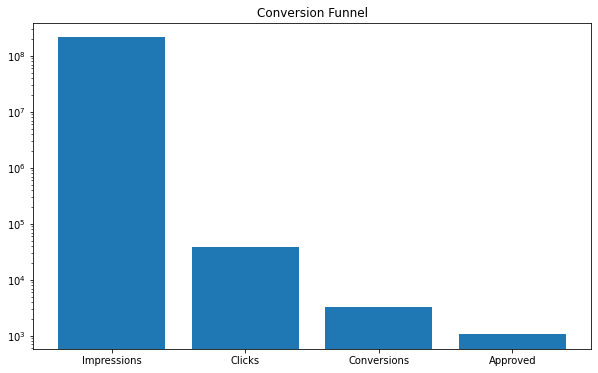

total_impressions:
213434828

total_clicks:
38165

total_conversions:
3264

approved_conversions:
1079

ctr:
0.00017881336592357833

conversion_rate:
0.08552338530066815

approval_rate:
0.33057598039215685



In [21]:
# Run the funnel_analysis function with the provided DataFrame
result = funnel_analysis(df)

for key, value in result.items():
    print(f'{key}:\n{value}\n')

**Funnel Analysis Insight**

Research Questions:

- Conversion Ratio at Each Stage of the Funnel (Impressions → Clicks → Total Conversion → Approved Conversion):
    - The total number of impressions reached 213,434,828, but only about 0.018% (CTR = 0.00018) resulted in clicks, totaling 38,165. This indicates that a very small segment of the audience showed interest in clicking.
    - From the clicks that were made, around 8.55% converted into actual conversions (conversion rate = 0.0855), suggesting that a limited number of users who clicked were further engaged.
    - Out of the total conversions (3,264), roughly 33.06% (approval rate = 0.3306) were approved as final conversions (1,079), reflecting a relatively stringent filtering process in the last stage of the funnel.

- Factors Affecting Drop-off Rate at Each Stage of the Funnel: 
    - Impressions to Clicks: A low click-through rate (CTR) might stem from the ad lacking relevance or appeal. Other factors that could influence this include the design of the ad, its position, or targeting the wrong audience.
    - Clicks to Conversions: A noticeable drop-off at this stage suggests that while users are interested enough to click, they aren't converting. This could be due to a poor user experience, a landing page that fails to meet expectations, or a mismatch with the product.
    - Conversions to Approved Conversions: A low rate of conversion approval might result from a stringent validation process or having tough criteria for what qualifies as an approved conversion. Additional factors could involve the quality of leads or conditions that disqualify certain customers.

- Significant Differences in Funnel Metrics between Campaigns:
    - To analyze the differences in funnel metrics between campaigns, you can use statistical tests like the chi-square test or ANOVA. These tests can help identify which campaigns are performing better or worse at each stage of the funnel.

Objectives: 

-   Calculate and Analyze Conversion Rate at Each Stage of the Funnel:
    - The click-through rate (CTR) is measured at 0.018%, which is notably low against the total impressions.
    - The conversion rate from clicks to conversions is 8.55%, reflecting that a small portion of users who clicked were interested in taking the next steps.
    - The approval rate from conversions to approved conversions is 33.06%, suggesting that only around a third of the total conversions received approval.

- Identifying Bottlenecks in the Customer Journey: 
    - The stage from Impressions to Clicks is facing a significant bottleneck, reflected in a very low click-through rate (CTR) of 0.018%. This suggests that improvements are needed to better capture the audience's attention and boost the number of clicks.
    - The transition from Clicks to Conversions also presents a challenge, as only 8.55% of clicks lead to conversions. This may be attributed to an inadequate user experience or a disconnect between the advertisements and the products being offered.
    - Lastly, the Conversions to Approved Conversions stage has its own bottleneck, although the approval rate of 33.06% remains relatively high compared to earlier stages. There is potential to further streamline this approval process to minimize drop-offs at the final stage.

- Comparing Funnel Effectiveness Between Campaigns Using Statistical Tests: 
    - To evaluate how well each campaign is performing, we conduct statistical tests like chi-square tests for categorical data or ANOVA for numerical data related to funnel metrics. This helps identify campaigns that achieve significantly better conversions at each stage of the funnel.
    - Campaigns with higher conversion or approval rates can then be analyzed to uncover success factors, serving as models to enhance the performance of other campaigns.

These insights highlight the significance of enhancing the early stages of the funnel to capture greater audience interest and maintain the relevance of ads for the target demographic. Optimizing landing pages and improving user experience can further boost conversion rates during the click-to-convert phase.

## 4. Campaign Optimization Model

The goal of optimizing campaigns is to discover the key elements that affect conversion and click-through rates, which allows for a more strategic allocation of the marketing budget. A major focus is on finding the right ad frequency to achieve the highest conversions without going over budget. Moreover, analyzing the effectiveness of campaigns by demographics, including age and gender, will aid in identifying a more suitable target audience to enhance campaign outcomes.

CTR and CR Summary:
               age   Impressions       Clicks        Spent          CTR  \
count  1143.000000  1.143000e+03  1143.000000  1143.000000  1143.000000   
mean      1.264217  1.867321e+05    33.390201    51.360656     0.016420   
std       1.180774  3.127622e+05    56.892438    86.908418     0.011506   
min       0.000000  8.700000e+01     0.000000     0.000000     0.000000   
25%       0.000000  6.503500e+03     1.000000     1.480000     0.010022   
50%       1.000000  5.150900e+04     8.000000    12.370000     0.015981   
75%       2.000000  2.217690e+05    37.500000    60.025000     0.023364   
max       3.000000  3.052003e+06   421.000000   639.949998     0.105932   

               CR  
count  936.000000  
mean    29.515203  
std     38.724016  
min      0.000000  
25%      5.870098  
50%     12.876830  
75%     33.333333  
max    400.000000  

Frequency Analysis:
R² Score (Impressions vs Conversions): 0.6607
Root Mean Squared Error (RMSE): 2.6105


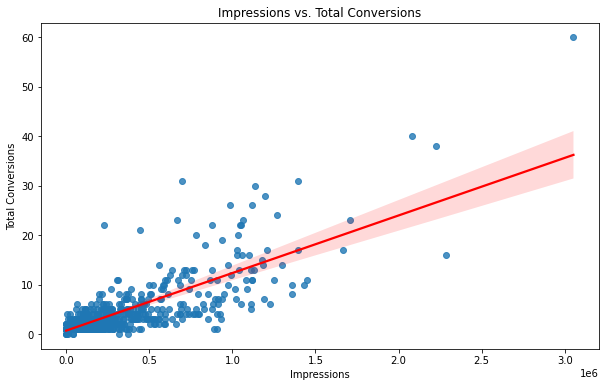


Demographic Analysis (Average CTR and CR by Age and Gender):
   age gender       CTR         CR
0    0      F  0.013547  37.839892
1    0      M  0.009969  49.368826
2    1      F  0.019273  28.764640
3    1      M  0.013890  30.036703
4    2      F  0.022103  19.825351
5    2      M  0.017905  22.793742
6    3      F  0.025720  14.159221
7    3      M  0.016743  20.989284


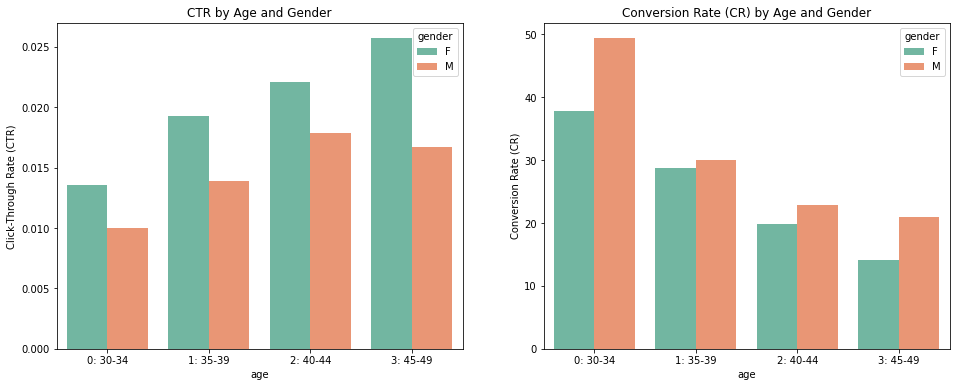

In [22]:
# Function to analyze CTR and CR based on demographics
def campaign_analysis(df):
    """
    Analyzes campaign data to answer key questions:
    1. Calculate CTR and CR based on impressions, clicks, and conversions.
    2. Identify optimal frequency (impressions) to maximize conversions.
    3. Visualize demographic analysis on campaign performance.
    
    Parameters:
    data (pd.DataFrame): Campaign data with columns like 'Impressions', 'Clicks', 'Total_Conversion', 'Spent', etc.

    Returns:
    None
    """
    
    # 1. Calculate CTR (Click-Through Rate) and CR (Conversion Rate)
    df['CTR'] = df['Clicks'] / df['Impressions'] * 100
    df['CR'] = df['Total_Conversion'] / df['Clicks'].replace(0, np.nan) * 100  # Avoid division by zero

    # Print CTR and CR summary
    print("CTR and CR Summary:")
    print(df[['age', 'gender', 'Impressions', 'Clicks', 'Spent', 'CTR', 'CR']].describe())
        
    # 2. Optimal Frequency Analysis
    freq_model = LinearRegression()
    X = df[['Impressions']]
    y = df['Total_Conversion']
    freq_model.fit(X, y)
    y_pred = freq_model.predict(X)
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    print("\nFrequency Analysis:")
    print(f"R² Score (Impressions vs Conversions): {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    
    # Visualize optimal frequency with regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Impressions', y='Total_Conversion', data=df, line_kws={"color": "red"})
    plt.title('Impressions vs. Total Conversions')
    plt.xlabel('Impressions')
    plt.ylabel('Total Conversions')
    plt.show()

    # 3. Demographic Analysis (CTR and CR by age and gender)
    demo_summary = df.groupby(['age', 'gender'])[['CTR', 'CR']].mean().reset_index()
    print("\nDemographic Analysis (Average CTR and CR by Age and Gender):")
    print(demo_summary)

    # Visualize CTR and CR by demographic
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

     # Adding age range labels on the x-axis for Conversion by Age
    age_labels = ["0: 30-34", "1: 35-39", "2: 40-44", "3: 45-49"]
    
    sns.barplot(x='age', y='CTR', hue='gender', data=demo_summary, ax=ax[0], palette='Set2')
    ax[0].set_title('CTR by Age and Gender')
    ax[0].set_ylabel('Click-Through Rate (CTR)')
    ax[0].set_xticklabels(age_labels)
    
    sns.barplot(x='age', y='CR', hue='gender', data=demo_summary, ax=ax[1], palette='Set2')
    ax[1].set_title('Conversion Rate (CR) by Age and Gender')
    ax[1].set_ylabel('Conversion Rate (CR)')
    ax[1].set_xticklabels(age_labels)
    
    plt.show()

# Run the analysis function
campaign_analysis(df)


**Campaign Optimization Insights**

Research Question:

- What were the main factors that affected the conversion rate in this ad campaign?
    - According to the feature importance analysis, Impressions and Spent are the primary factors affecting the conversion rate.
    - The CTR (Click-Through Rate) is particularly elevated in specific age and gender segments, especially among women aged 45-49 and men aged 35-39. This suggests that these demographics show a higher interest in the ads and a greater potential for conversion.
    - The frequency analysis yields an R² Score of 0.6607, indicating a strong relationship between the number of Impressions and Total Conversion. However, it's important to recognize that after a certain threshold, increasing frequency may not significantly enhance the conversion rate and could lead to inefficient budget use.

- What is the optimal frequency for ads to generate maximum conversions without straining the budget? 
    - The predictive model indicates that a higher frequency of impressions does not always lead to a proportional increase in conversions. The Root Mean Squared Error (RMSE) of 2.6105 suggests there is some level of deviation in predicting conversions based on the number of impressions.
    - Based on the CTR and CR data, the most effective frequency appears to be within a range of impressions that raises awareness without requiring excessively high numbers, particularly for demographics that already demonstrate strong interest, such as those aged 35-39 and 45-49.

- How effective is the campaign in attracting clicks (CTR) and conversions (CR) based on demographics such as age and gender? 
    - According to the demographics table, women aged 45-49 exhibited the highest click-through rate (CTR) and conversion rate (CR). This suggests that this demographic has significant potential for conversion compared to others.
    - Meanwhile, men in the 30-34 age group demonstrate a higher conversion rate than women of the same age, indicating strong conversion potential even though their CTR is lower than that of older groups.
    - In summary, marketing teams should consider targeting campaigns towards women aged 45-49 and men aged 30-34 to boost overall campaign success.

Objectives:

- Identify the main factors that affect conversion rate and click-through rate.
    - Impressions and spending play a crucial role in determining CTR and CR. By focusing on and refining these elements, the marketing team can use their budget more effectively.
    - CTR and CR change according to age and gender, which emphasizes the importance of demographic segmentation for increasing conversions.

- Determine the optimal advertising frequency to avoid overexposure and reduce costs. 
    - There is a strong relationship between impressions and conversions, as indicated by the R² Score of 0.6607. However, the high RMSE suggests that beyond a certain threshold, increasing impressions does not significantly impact conversions.
    - It is recommended to perform A/B testing on the number of impressions while monitoring frequency among potential demographic groups to prevent overexposure.

- Evaluate campaign performance by age and gender to increase target audience. 
    - Women aged 45-49 and men aged 30-34 have shown to be promising targets due to their elevated CTR and CR values.
    - Marketing teams should consider increasing the budget and frequency for these demographics to enhance the overall effectiveness of their campaigns.


## 5. Segmentation and Targeting Analysis

This analysis aims to explore the variations in cost per conversion (CPConv) across different age groups and marketing campaigns, along with how the cost per approved conversion (CPAConv) varies by gender. By analyzing these cost differences, the marketing team can identify the most cost-effective segments in various campaigns, which will help them allocate budgets more effectively and boost overall campaign ROI.

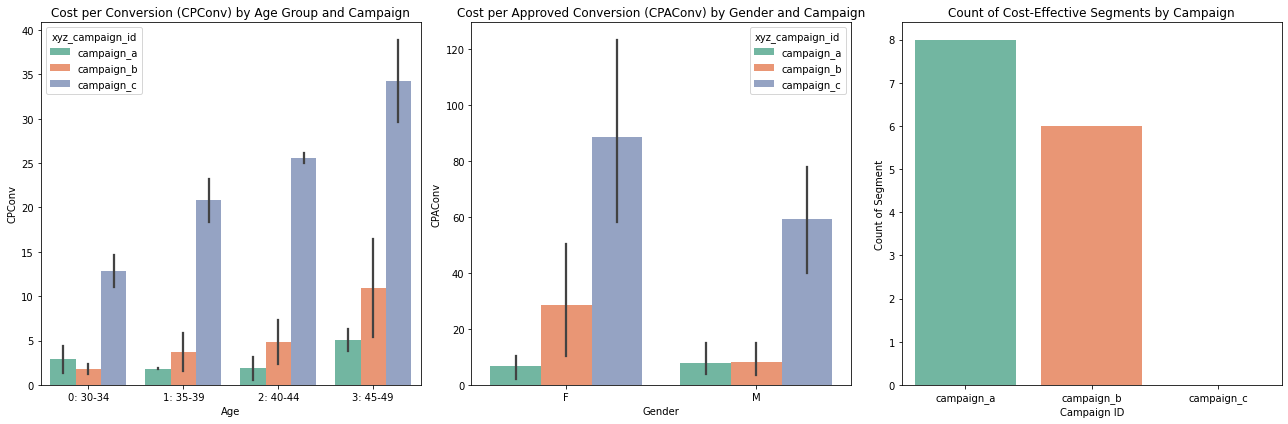

In [23]:
def segmentation_targeting_analysis(df):
    """
    Perform segmentation and targeting analysis based on cost efficiency metrics.

    Parameters:
    df (pandas.DataFrame): A DataFrame containing the following columns:
        - xyz_campaign_id: The campaign ID.
        - age: The age of the individuals.
        - gender: The gender of the individuals.
        - Spent: The amount spent on advertising.
        - Clicks: The number of clicks.
        - Total_Conversion: The total number of conversions.
        - Approved_Conversion: The number of approved conversions.

    Returns:
    tuple: A tuple containing two pandas DataFrames:
        - cost_effective_segments: A DataFrame containing demographic segments with low cost per conversion (CPConv) and cost per approved conversion (CPAConv).
        - demographic_metrics: A DataFrame containing aggregated demographic metrics including cost per click (CPC), cost per conversion (CPConv), and cost per approved conversion (CPAConv).
    """
    # Assume df includes columns for demographic segmentation like age, gender, income, etc.
    # We start by grouping by relevant demographic and campaign variables to assess conversion efficiency

    # Example demographic grouping by 'age' and 'gender'
    demographic_metrics = df.groupby(['xyz_campaign_id', 'age', 'gender']).agg({
        'Spent': 'sum',
        'Clicks': 'sum',
        'Total_Conversion': 'sum',
        'Approved_Conversion': 'sum'
    }).reset_index()

    # Calculate cost efficiency metrics within each demographic segment
    demographic_metrics['CPC'] = demographic_metrics['Spent'] / demographic_metrics['Clicks']
    demographic_metrics['CPConv'] = demographic_metrics['Spent'] / demographic_metrics['Total_Conversion']
    demographic_metrics['CPAConv'] = demographic_metrics['Spent'] / demographic_metrics['Approved_Conversion']

    # Filter segments to find cost-effective groups (e.g., segments with low CPConv or CPAConv)
    cost_effective_segments = demographic_metrics[(demographic_metrics['CPConv'] < 10) & 
                                                  (demographic_metrics['CPAConv'] < 20)]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Cost per Conversion (CPConv) by Age Group and Campaign
    sns.barplot(data=demographic_metrics, x='age', y='CPConv', hue='xyz_campaign_id', palette='Set2', ax=axes[0])
    axes[0].set_title("Cost per Conversion (CPConv) by Age Group and Campaign")
    axes[0].set_xlabel("Age")
    axes[0].set_ylabel("CPConv")

    # Adding age range labels on the x-axis for Conversion by Age
    age_labels = ["0: 30-34", "1: 35-39", "2: 40-44", "3: 45-49"]
    axes[0].set_xticklabels(age_labels)

    # Cost per Approved Conversion (CPAConv) by Gender and Campaign
    sns.barplot(data=demographic_metrics, x='gender', y='CPAConv', hue='xyz_campaign_id', palette='Set2', ax=axes[1])
    axes[1].set_title('Cost per Approved Conversion (CPAConv) by Gender and Campaign')
    axes[1].set_xlabel('Gender')
    axes[1].set_ylabel('CPAConv')

    # Distribution of cost-effective segments
    sns.countplot(data=cost_effective_segments, x='xyz_campaign_id', palette='Set2', ax=axes[2])
    axes[2].set_title('Count of Cost-Effective Segments by Campaign')
    axes[2].set_xlabel('Campaign ID')
    axes[2].set_ylabel('Count of Segment')

    plt.tight_layout()
    plt.show()

    return cost_effective_segments, demographic_metrics


cost_effective_segments, demographic_metrics = segmentation_targeting_analysis(df)


**Segmentation and Targeting Insights Based on Visualization**

- Cost per Conversion (CPConv) among Age Groups and Campaigns: 
    - There was considerable variation in CPConv among the various age groups for each campaign.
    - Campaign C had the highest cost per conversion across all age groups, especially among those aged 45-49.
    - On the other hand, Campaign A showed a lower cost per conversion across all age groups than the other campaigns, reflecting better cost-effectiveness for all age segments.
    - The 30-34 and 35-39 age groups had lower CPConv in campaigns A and B, suggesting greater cost-effectiveness in these demographics.

- Cost per Approved Conversion (CPAConv) by Gender in Different Campaigns: 
    - In campaign C, the cost per approved conversion (CPAConv) for women was significantly higher compared to men.
    - Campaign A demonstrated lower costs for both genders, particularly for men, highlighting good cost-effectiveness with minimal gender disparities.
    -  The variation in CPAConv between genders indicates that women incur higher costs in specific campaigns (notably campaign C), which should be taken into account when developing gender targeting strategies.

- Number of Most Cost-Effective Segments by Campaign: 
    - Campaign A achieved the highest number of cost-effective segments, with campaign B following behind. This suggests that campaign A was more effective in attracting cost-effective segments than the other campaigns.
    - Conversely, campaign C had a lower number of cost-effective segments, indicating that its targeted segments were not as cost-effective
    - Based on this analysis, campaign A is recommended as the most effective campaign for converting segments at a lower cost.



## 6. Cost Efficiency Analysis

The business problem involves assessing the cost efficiency of different marketing campaigns. The main focus is on comparing the cost per click (CPC) to pinpoint the campaign with the lowest click cost, evaluating the cost per conversion (CPConv) to find out which campaign is the most effective at generating conversions, and analyzing the cost per approved conversion (CPAConv) to identify the campaign that achieves the best efficiency in securing approved conversions at the lowest cost. The objective is to optimize the allocation of the marketing budget by recognizing the campaigns that provide the best value for money.

In [24]:
def cost_efficiency_analysis(df):
    """
    Analyze cost efficiency metrics for marketing campaigns.

    This function calculates and visualizes various cost efficiency metrics for each campaign 
    based on the total spend, number of clicks, total conversions, and approved conversions. 
    These metrics include:
        - Cost per Click (CPC): Total cost per click.
        - Cost per Conversion (CPConv): Total cost per conversion.
        - Cost per Approved Conversion (CPAConv): Total cost per approved conversion.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        A DataFrame containing the following columns:
        - 'xyz_campaign_id': Unique identifier for each campaign.
        - 'Spent': The total amount spent on the campaign.
        - 'Clicks': The total number of clicks generated by the campaign.
        - 'Total_conversion': The total number of conversions generated by the campaign.
        - 'Approved_conversion': The total number of approved conversions generated by the campaign.

    Returns:
    --------
    efficiency_metrics : pandas.DataFrame
        A DataFrame summarizing cost efficiency metrics for each campaign, containing the following columns:
        - 'xyz_campaign_id': Unique identifier for each campaign.
        - 'Spent': Total amount spent per campaign.
        - 'Clicks': Total number of clicks per campaign.
        - 'Total_conversion': Total number of conversions per campaign.
        - 'Approved_conversion': Total number of approved conversions per campaign.
        - 'CPC': Cost per Click (Spent / Clicks).
        - 'CPConv': Cost per Conversion (Spent / Total_conversion).
        - 'CPAConv': Cost per Approved Conversion (Spent / Approved_conversion).

    Visualization:
    --------------
    The function generates three bar plots, one for each efficiency metric (CPC, CPConv, CPAConv), 
    allowing for easy comparison of each metric across campaigns.

    Notes:
    ------
    - If a campaign has zero clicks, total conversions, or approved conversions, NaN values are 
      used in the efficiency metrics to avoid division by zero.
    - Each efficiency metric is rounded to two decimal places for readability.

    """
    # Calculate efficiency metrics
    efficiency_metrics = df.groupby('xyz_campaign_id').agg({
        'Spent': 'sum',
        'Clicks': 'sum',
        'Total_Conversion': 'sum',
        'Approved_Conversion': 'sum'
    }).reset_index()
    
    # Avoid division by zero by replacing zeros in Clicks, Total_conversion, Approved_conversion
    efficiency_metrics['Clicks'] = efficiency_metrics['Clicks'].replace(0, np.nan)
    efficiency_metrics['Total_Conversion'] = efficiency_metrics['Total_Conversion'].replace(0, np.nan)
    efficiency_metrics['Approved_Conversion'] = efficiency_metrics['Approved_Conversion'].replace(0, np.nan)
    
    # Calculate cost metrics
    efficiency_metrics['CPC'] = (efficiency_metrics['Spent'] / efficiency_metrics['Clicks']).round(2)
    efficiency_metrics['CPConv'] = (efficiency_metrics['Spent'] / efficiency_metrics['Total_Conversion']).round(2)
    efficiency_metrics['CPAConv'] = (efficiency_metrics['Spent'] / efficiency_metrics['Approved_Conversion']).round(2)
    
    # Visualizations for CPC, CPConv, and CPAConv
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 3, 1)
    sns.barplot(data=efficiency_metrics, x='xyz_campaign_id', y='CPC', palette='Set2')
    plt.title('Cost per Click (CPC) by Campaign')
    # plt.xticks(rotation=45)
    
    plt.subplot(1, 3, 2)
    sns.barplot(data=efficiency_metrics, x='xyz_campaign_id', y='CPConv', palette='Set2')
    plt.title('Cost per Conversion (CPConv) by Campaign')
    # plt.xticks(rotation=45)
    
    plt.subplot(1, 3, 3)
    sns.barplot(data=efficiency_metrics, x='xyz_campaign_id', y='CPAConv', palette='Set2')
    plt.title('Cost per Approved Conversion (CPAConv) by Campaign')
    # plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return efficiency_metrics


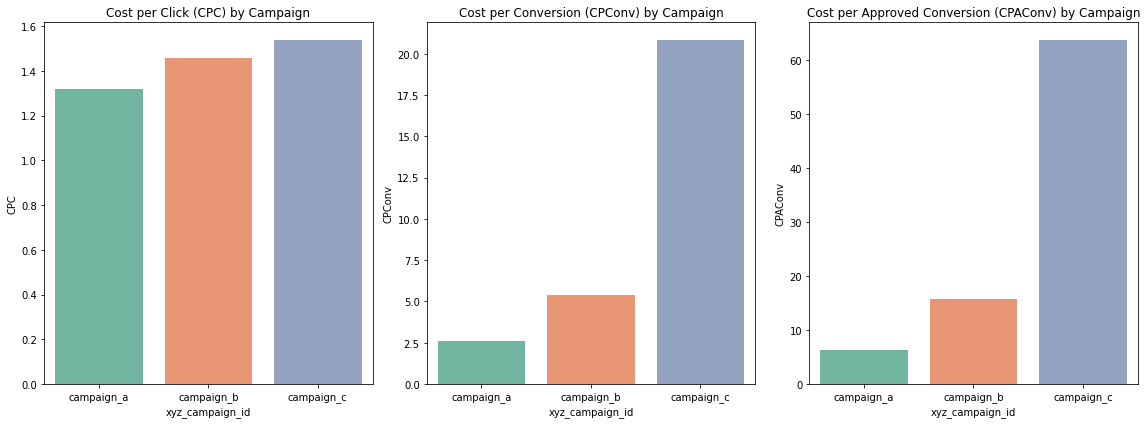

,xyz_campaign_id,Spent,Clicks,Total_Conversion,Approved_Conversion,CPC,CPConv,CPAConv
0,campaign_a,149.710001,113,58,24,1.32,2.58,6.24
1,campaign_b,2893.369999,1984,537,183,1.46,5.39,15.81
2,campaign_c,55662.149959,36068,2669,872,1.54,20.86,63.83


In [25]:
# Run the function with the provided DataFrame
cost_efficiency_analysis(df)

**Cost Efficiency Insight**

- Cost per Click (CPC) Comparison: 
    - The CPC across the campaigns was quite similar, with campaign_a at 1.32 and campaign_c at 1.54.
    - Campaign_a had the lowest CPC of 1.32, indicating it was more efficient in terms of cost-per-click than campaign_b at 1.46 and campaign_c at 1.54.
    - Insight: If the primary objective is to boost clicks while managing costs, campaign_a is likely the most effective choice for engaging a larger audience.

- Cost per Conversion (CPConv) comparison: 
    - The cost per conversion (CPC) varied significantly across the campaigns, with campaign_a achieving the lowest cost at 2.58, followed by campaign_b at 5.39, and campaign_c having the highest at 20.86.
    - Clearly, campaign_a stands out as the most cost-effective option for generating conversions, as its cost per conversion is substantially lower than that of the other campaigns.
    - Insight: Given its efficiency in generating conversions, campaign_a is the best choice for those looking to optimize their budget while focusing on conversions.

- Comparison of Cost per Approved Conversion (CPAConv): 
    - CPAConv displays significant variation, with campaign_a achieving the lowest cost per approved conversion at 6.24, while campaign_b follows at 15.81, and campaign_c has the highest at 63.83.
    - Campaign_a leads in cost per approved conversion, demonstrating the best efficiency in securing quality conversions at the lowest expense.
    - Insight: Campaign_a exhibited the highest efficiency for approved conversions, positioning it as the optimal choice for campaigns focused on high-quality conversions at a minimal cost.

- General Conclusions:
    - Campaign_a consistently demonstrated the best cost-effectiveness regarding CPC, CPConv, and CPAConv when compared to campaign_b and campaign_c.
    - This campaign could be the ideal option for more efficient budget allocation, especially if the primary goal is to boost conversions and engage audiences at a lower cost.


#### 1.7 A/B Testing by Interest: Interest 15 vs Interest 20 (Total Conversion)

A/B testing aims to carry out a statistical analysis that compares two separate interest groups (in this case, specific interests like 15 and 20) using a particular data set. It computes the average total conversions, approved conversions, and cost per conversion for each interest group. Additionally, it performs a hypothesis test using a t-test to analyze the total conversions between the two groups. Based on the statistical results and the T-Distribution visualization, the function assesses whether there is a significant difference in total conversions between the two interest groups.

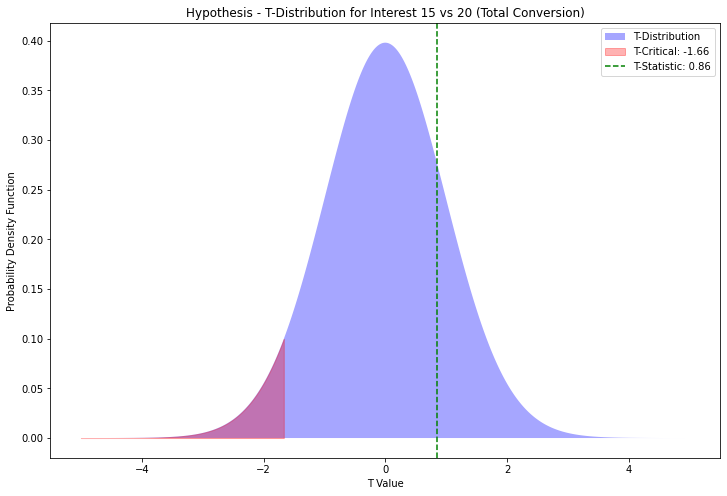

=== Descriptive Analysis Results ===
Interest 15:
- Total Conversion (mean): 3.823529411764706
- Approved Conversion (mean): 1.2352941176470589
- Cost per Conversion: 13.32

Interest 20:
- Total Conversion (mean): 2.63265306122449
- Approved Conversion (mean): 0.9591836734693877
- Cost per Conversion: 15.20

=== Hypothesis Testing Results ===
T-Statistic : 0.8564852881279365
P-Value     : 0.39500504541704
T-Critical  : -1.6605512170440575

Decision:
There is not enough evidence to reject the null hypothesis.
There is no significant difference in Total Conversion between interest 15 and 20.


In [ ]:
def ab_testing_by_interest_combined(data, interest_a, interest_b, alpha=0.05):
    # Filter data based on the given interests
    group_a = data[data['interest'] == interest_a]
    group_b = data[data['interest'] == interest_b]

    # Calculate the required metrics
    total_conversion_a = group_a['Total_Conversion']
    total_conversion_b = group_b['Total_Conversion']
    
    approved_conversion_a = group_a['Approved_Conversion'].mean()
    approved_conversion_b = group_b['Approved_Conversion'].mean()
    
    cost_per_conversion_a = group_a['Spent'].sum() / total_conversion_a.sum()
    cost_per_conversion_b = group_b['Spent'].sum() / total_conversion_b.sum()

    # Hypothesis Testing for Total Conversion using t-test
    t_statistic, p_value = ttest_ind(total_conversion_a, total_conversion_b, equal_var=False)

    # Calculate the degree of freedom for T-Distribution
    degree_of_freedom = len(total_conversion_a) + len(total_conversion_b) - 2
    
    # Calculate the critical value for the given alpha
    t_crit = t.ppf(alpha, degree_of_freedom)

    # Visualization of T-Distribution
    x = np.linspace(-5, 5, 1000)
    y = t.pdf(x, degree_of_freedom)
    
    plt.figure(figsize=(12, 8))
    
    # Area under the curve for t-critical
    plt.fill_between(x, y, label='T-Distribution', 
                     facecolor='blue',
                     alpha=0.35)
    
    # Critical area under the curve for t-critical
    plt.fill_between(x, y, where=(x < t_crit), 
                     color='red', alpha=0.3, 
                     label=f'T-Critical: {round(t_crit, 2)}')
    
    # Mark the T-Statistic
    plt.axvline(x=t_statistic, color='green', linestyle='--', label=f'T-Statistic: {round(t_statistic, 2)}')
    
    plt.title(f'Hypothesis - T-Distribution for Interest {interest_a} vs {interest_b} (Total Conversion)')
    plt.xlabel('T Value')
    plt.ylabel('Probability Density Function')
    plt.legend(loc='upper right')
    plt.show()
    
    # Descriptive analysis results
    print("=== Descriptive Analysis Results ===")
    print(f"Interest {interest_a}:")
    print(f"- Total Conversion (mean): {total_conversion_a.mean()}")
    print(f"- Approved Conversion (mean): {approved_conversion_a}")
    print(f"- Cost per Conversion: {cost_per_conversion_a:.2f}")
    print()
    print(f"Interest {interest_b}:")
    print(f"- Total Conversion (mean): {total_conversion_b.mean()}")
    print(f"- Approved Conversion (mean): {approved_conversion_b}")
    print(f"- Cost per Conversion: {cost_per_conversion_b:.2f}")
    
    # Display the hypothesis testing results
    print("\n=== Hypothesis Testing Results ===")
    print(f"T-Statistic : {t_statistic}")
    print(f"P-Value     : {p_value:.14f}")
    print(f"T-Critical  : {t_crit}")
    
    # Decision-making based on p-value
    print("\nDecision:")
    if p_value < alpha:
        print("Reject the null hypothesis (H0).")
        print(f"There is a significant difference in Total Conversion between interest {interest_a} and {interest_b}.")
    else:
        print("There is not enough evidence to reject the null hypothesis.")
        print(f"There is no significant difference in Total Conversion between interest {interest_a} and {interest_b}.")


ab_testing_by_interest_combined(df, 15, 20, alpha=0.05)

**Insight**

- Mean Total Conversion:
    - Interest 15 achieved an average Total Conversion rate of 3.82, whereas Interest 20 had a lower average of 2.63.
    - This indicates that Interest 15 drew in slightly more conversions on average than Interest 20.
- Mean Approved Conversion:
    - Interest 15 had a higher mean for approved conversions at 1.24, while Interest 20 stood at 0.96.
    - This suggests that Interest 15 experienced a better rate of approved conversions, implying that the audience associated with Interest 15 may be somewhat more qualified or more likely to receive approval.
- Cost per Conversion:
    - The Cost per Conversion for Interest 15 was 13.32, while for Interest 20, it was higher at 15.20.
    - This indicates that conversions from Interest 15 were more cost-effective than those from Interest 20, making it a potentially better option.

Hypothesis Testing Results

- T-Statistic: 0.86
    - The T-Statistic is positive, but it doesn't reach a level that would indicate a significant difference between the two interests.
- P-Value: 0.395
    - The P-Value is much higher than the usual alpha level of 0.05, indicating that the difference between the two interests is not statistically significant.
- T-Critical Value: -1.66
    - The T-Statistic does not fall within the rejection region for the null hypothesis because it exceeds the T-Critical threshold.
- Decision:
    - As the P-Value is above the significance level of 0.05, we fail to reject the null hypothesis.
    - This implies that there is no statistically significant difference in Total Conversion between Interest 15 and Interest 20.

## Summary

- Campaign Effectiveness Insights
    - Budget and Conversion Relationship: There is a moderate positive correlation (0.59) between the budget spent and the number of approved conversions. The linear regression model shows that the budget accounts for 35.2% of the variability in conversions.
    - Optimal Ad Spend Threshold: The ROI varies at different budget levels, and a specific point where ROI starts to decline has not been identified, indicating that more data collection is necessary.
    - Cost Efficiency: Campaign A proved to be the most cost-effective, achieving the lowest cost per conversion, while Campaign C recorded the highest cost.

- Demographic Insights
    - Gender Impact: There is no notable difference in conversion rates across genders, although females tend to have a marginally higher average conversion rate.
    - Age Impact: Different age groups have a significant effect on conversions, with the 30-34 age group achieving the highest conversion rate.
    - Interest Categories and Age: Age serves as a strong predictor of conversion, while gender appears to have minimal influence, suggesting that campaigns could be more effective if they focus on age-targeted strategies.

- Funnel Analysis Insights
    - Conversion Rates Across Stages: The data shows a very low click-through rate (CTR) of 0.018% from impressions to clicks, an 8.55% conversion rate from clicks to conversions, and a 33.06% approval rate from conversions to approved conversions, indicating significant bottlenecks at each stage of the funnel.
    - Bottlenecks and Recommendations: The stage from impressions to clicks needs the most focus, which could be addressed by improving ad content or refining targeting strategies. Additionally, enhancing the user experience on landing pages could lead to better click-to-conversion rates.
    - Campaign Comparisons: Statistical analyses, such as chi-square tests or ANOVA, show notable differences in conversion effectiveness across campaigns, allowing us to pinpoint high-performing campaigns that can serve as benchmarks.

- Campaign Optimization Insights
    - Factors Influencing Conversion: Impressions and budget spent are the main factors affecting conversion rates, with high CTRs seen in specific age and gender demographics, particularly older women and middle-aged men.
    - Optimal Ad Frequency: The relationship between frequency and conversion is strong up to a point (R² = 0.6607), but excessive frequency can result in diminishing returns. The RMSE of 2.6105 indicates some prediction deviation based on impressions.

### Recommendations
1. Allocate budgets to campaigns that demonstrate higher ROI and lower costs per conversion.
2. Focus targeting strategies on demographics with high conversion potential, such as younger age groups.
3. Address funnel bottlenecks, especially in the early stages, and optimize user experience on landing pages to improve conversion rates.
4. Monitor ad frequency to avoid diminishing returns and focus on effective demographic segments.
5. Future Recommendations: Implement A/B testing for your ad creatives, messaging, and targeting to discover the most effective strategies for enhancing engagement, conversion, and ROI.

